In [65]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import datetime as dt
import ast
import random

In [66]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [67]:
credits = pd.read_csv('credits.csv')
titles = pd.read_csv('titles.csv')

In [68]:
titles.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600


In [69]:
titles.shape

(5850, 15)

In [70]:
titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5850 entries, 0 to 5849
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5850 non-null   object 
 1   title                 5849 non-null   object 
 2   type                  5850 non-null   object 
 3   description           5832 non-null   object 
 4   release_year          5850 non-null   int64  
 5   age_certification     3231 non-null   object 
 6   runtime               5850 non-null   int64  
 7   genres                5850 non-null   object 
 8   production_countries  5850 non-null   object 
 9   seasons               2106 non-null   float64
 10  imdb_id               5447 non-null   object 
 11  imdb_score            5368 non-null   float64
 12  imdb_votes            5352 non-null   float64
 13  tmdb_popularity       5759 non-null   float64
 14  tmdb_score            5539 non-null   float64
dtypes: float64(5), int64(

In [71]:
titles.count()

id                      5850
title                   5849
type                    5850
description             5832
release_year            5850
age_certification       3231
runtime                 5850
genres                  5850
production_countries    5850
seasons                 2106
imdb_id                 5447
imdb_score              5368
imdb_votes              5352
tmdb_popularity         5759
tmdb_score              5539
dtype: int64

In [72]:
titles.duplicated().sum()

0

In [73]:
titles.isnull().sum()

id                         0
title                      1
type                       0
description               18
release_year               0
age_certification       2619
runtime                    0
genres                     0
production_countries       0
seasons                 3744
imdb_id                  403
imdb_score               482
imdb_votes               498
tmdb_popularity           91
tmdb_score               311
dtype: int64

In [74]:
titles = titles.drop(['description', 'imdb_id'], axis = 1)

In [75]:
titles.describe().T


,count,mean,std,min,25%,50%,75%,max
release_year,5850.0,2016.417094,6.937726,1945.000000,2016.0000,2018.000,2020.0000,2022.000
runtime,5850.0,76.888889,39.002509,0.000000,44.0000,83.000,104.0000,240.000
seasons,2106.0,2.162868,2.689041,1.000000,1.0000,1.000,2.0000,42.000
imdb_score,5368.0,6.510861,1.163826,1.500000,5.8000,6.600,7.3000,9.600
imdb_votes,5352.0,23439.382474,95820.470909,5.000000,516.7500,2233.500,9494.0000,2294231.000
tmdb_popularity,5759.0,22.637925,81.680263,0.009442,2.7285,6.821,16.5900,2274.044
tmdb_score,5539.0,6.829175,1.170391,0.500000,6.1000,6.900,7.5375,10.000


In [76]:
titles.isna().sum()

id                         0
title                      1
type                       0
release_year               0
age_certification       2619
runtime                    0
genres                     0
production_countries       0
seasons                 3744
imdb_score               482
imdb_votes               498
tmdb_popularity           91
tmdb_score               311
dtype: int64

In [77]:
(titles.isna().sum() * 100) / len(titles)

id                       0.000000
title                    0.017094
type                     0.000000
release_year             0.000000
age_certification       44.769231
runtime                  0.000000
genres                   0.000000
production_countries     0.000000
seasons                 64.000000
imdb_score               8.239316
imdb_votes               8.512821
tmdb_popularity          1.555556
tmdb_score               5.316239
dtype: float64

In [78]:
titles.seasons = titles.seasons.fillna(0)

In [79]:
titles.imdb_score = titles.imdb_score.fillna(titles.imdb_score.median())

In [17]:
titles.imdb_votes = titles.imdb_votes.fillna(titles.imdb_votes.median())

In [18]:
titles.tmdb_popularity = titles.tmdb_popularity.fillna(titles.tmdb_popularity.median())

In [19]:
titles.tmdb_score = titles.tmdb_score.fillna(titles.tmdb_score.median())

In [20]:
titles.isna().sum()

id                         0
title                      1
type                       0
release_year               0
age_certification       2619
runtime                    0
genres                     0
production_countries       0
seasons                    0
imdb_score                 0
imdb_votes                 0
tmdb_popularity            0
tmdb_score                 0
dtype: int64

In [21]:
titles.seasons = titles.seasons.astype(int) 

In [22]:
def repair_array_bound_categories(arr):
    arr = ast.literal_eval(arr)
    
    if len(arr) == 0:
        return np.nan
    
    elif len(arr) == 1:
        return arr[0]
    
    else:
        return random.choice(arr)

In [23]:
titles["production_countries"] = titles["production_countries"].apply(repair_array_bound_categories)
titles["genres"] = titles["genres"].apply(repair_array_bound_categories)

In [24]:
titles.head(10)

,id,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,1945,TV-MA,51,documentation,US,1,6.6,2233.5,0.600,6.900
1,tm84618,Taxi Driver,MOVIE,1976,R,114,drama,US,0,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,1972,R,109,thriller,US,0,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,1975,PG,91,comedy,GB,0,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,1967,NaN,150,war,US,0,7.7,72662.0,20.398,7.600
5,ts22164,Monty Python's Flying Circus,SHOW,1969,TV-14,30,comedy,GB,4,8.8,73424.0,17.617,8.306
6,tm70993,Life of Brian,MOVIE,1979,R,94,comedy,GB,0,8.0,395024.0,17.770,7.800
7,tm14873,Dirty Harry,MOVIE,1971,R,102,thriller,US,0,7.7,155051.0,12.817,7.500
8,tm119281,Bonnie and Clyde,MOVIE,1967,R,110,crime,US,0,7.7,112048.0,15.687,7.500
9,tm98978,The Blue Lagoon,MOVIE,1980,R,104,action,US,0,5.8,69844.0,50.324,6.156


In [25]:
print(titles.duplicated().sum())
print(titles.isnull().sum())

0
id                         0
title                      1
type                       0
release_year               0
age_certification       2619
runtime                    0
genres                    59
production_countries     229
seasons                    0
imdb_score                 0
imdb_votes                 0
tmdb_popularity            0
tmdb_score                 0
dtype: int64


In [26]:
titles.age_certification.value_counts()

age_certification
TV-MA    883
R        556
TV-14    474
PG-13    451
PG       233
TV-PG    188
G        124
TV-Y7    120
TV-Y     107
TV-G      79
NC-17     16
Name: count, dtype: int64

In [27]:
titles.drop('age_certification', inplace = True, axis = 1)
titles.columns

Index(['id', 'title', 'type', 'release_year', 'runtime', 'genres',
       'production_countries', 'seasons', 'imdb_score', 'imdb_votes',
       'tmdb_popularity', 'tmdb_score'],
      dtype='object')

In [28]:
#visualisation


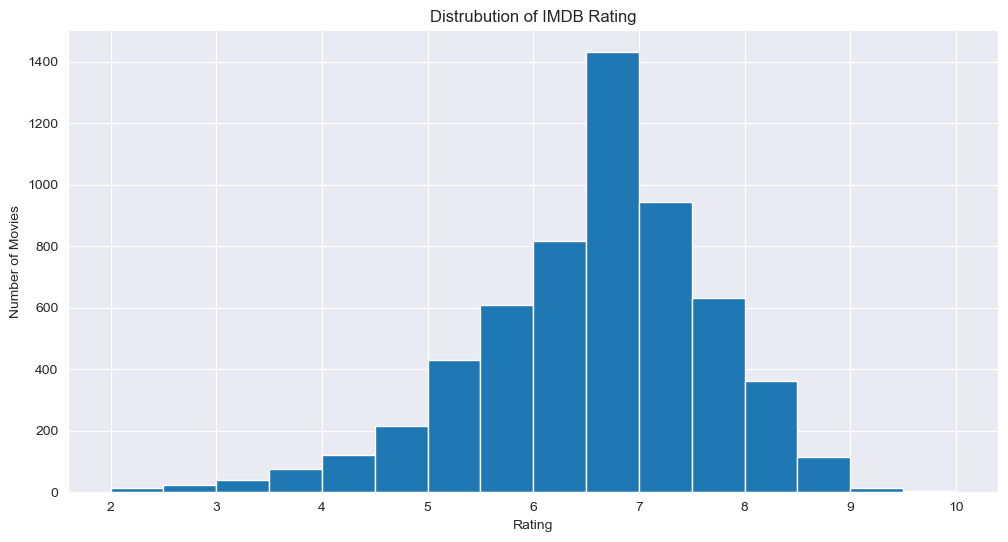

In [29]:
sns.set_style('darkgrid')
plt.figure(figsize=(12, 6))
plt.title('Distrubution of IMDB Rating')
plt.xlabel('Rating')
plt.ylabel('Number of Movies')

plt.hist(titles.imdb_score, bins=np.arange(2,10.1,.5));

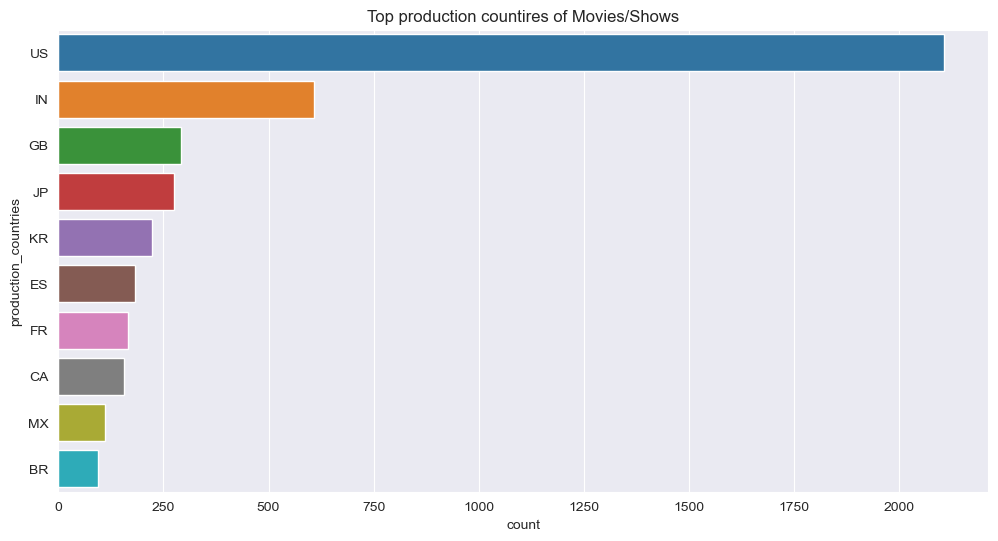

In [30]:
Top_production_countires=titles.production_countries.value_counts().sort_values(ascending= False).head(10)
plt.figure(figsize=(12,6))
plt.title('Top production countires of Movies/Shows')
xlable = ('Number of movies')
sns.barplot(x= Top_production_countires, y=Top_production_countires.index);

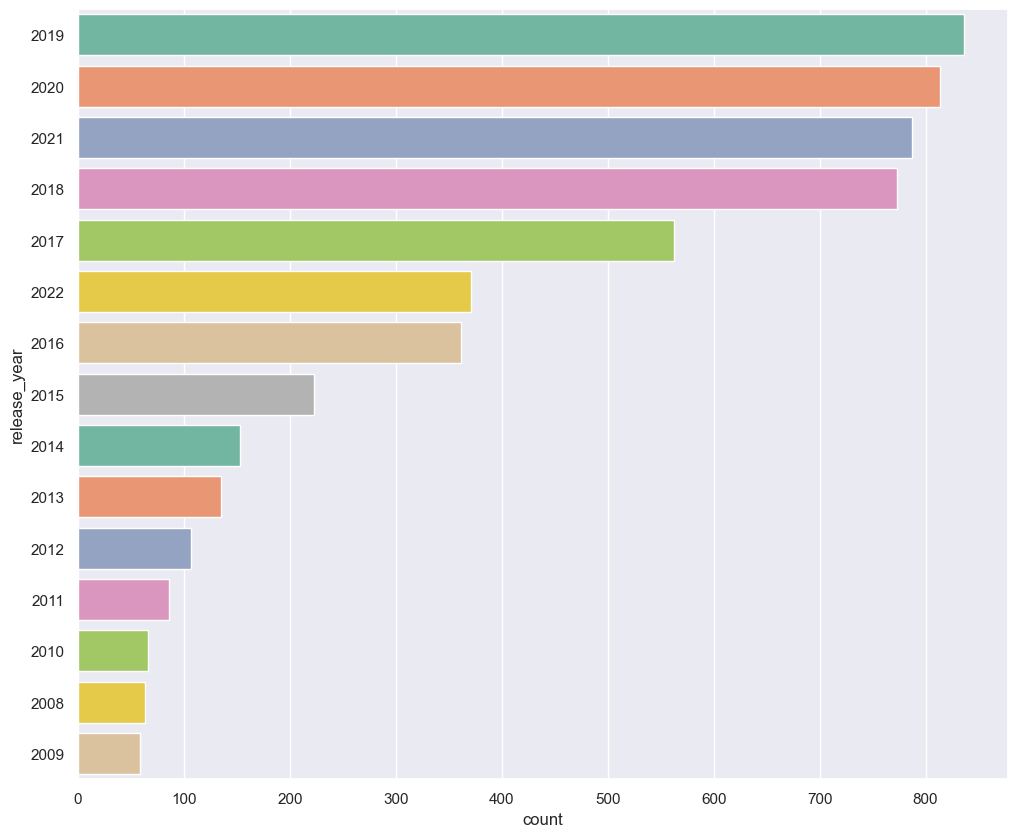

In [31]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=titles, palette="Set2", order=titles['release_year'].value_counts().index[0:15])

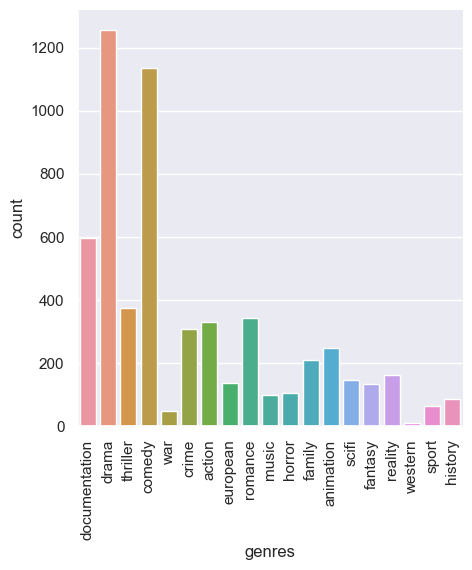

In [32]:
sns.catplot(data=titles, x='genres',kind="count")
plt.xticks(rotation=90)
plt.show()

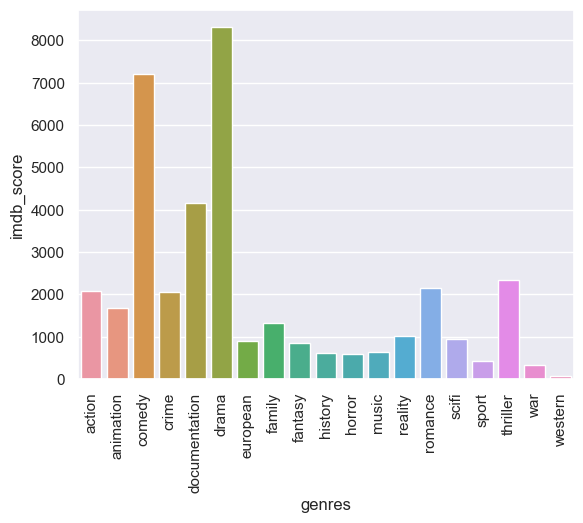

In [33]:
imdb_score = titles.groupby('genres')[['imdb_score']].sum().reset_index()
sns.barplot(x='genres',y='imdb_score',data=imdb_score)
plt.xticks(rotation=90);

In [34]:
imdb_score

,genres,imdb_score
0,action,2077.4
1,animation,1670.8
2,comedy,7200.6
3,crime,2058.8
4,documentation,4167.1
5,drama,8311.4
6,european,900.4
7,family,1317.5
8,fantasy,860.7
9,history,609.0


In [35]:
genre_imdb=titles.groupby('genres').imdb_score.describe()
genre_imdb=pd.DataFrame(genre_imdb)
genre_imdb=genre_imdb.reset_index()
genre_imdb.sort_values('mean',ascending=True)
genre_imdb[['genres','mean','std']]

,genres,mean,std
0,action,6.314286,1.230361
1,animation,6.737097,0.923991
2,comedy,6.344141,1.180462
3,crime,6.684416,0.928705
4,documentation,6.980067,0.861862
5,drama,6.612092,1.077069
6,european,6.524638,1.036052
7,family,6.244076,1.177123
8,fantasy,6.471429,1.017318
9,history,7.164706,0.751777


Text(0, 0.5, 'Genre')

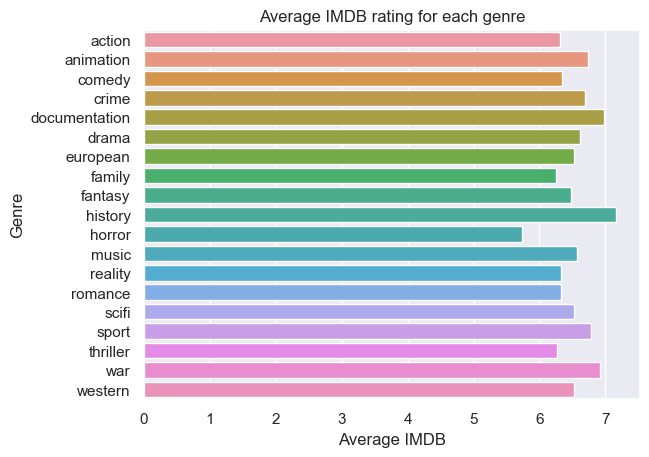

In [36]:
sns.barplot(x='mean',y='genres',data=genre_imdb)
plt.title('Average IMDB rating for each genre')
plt.xlabel('Average IMDB')
plt.ylabel('Genre')

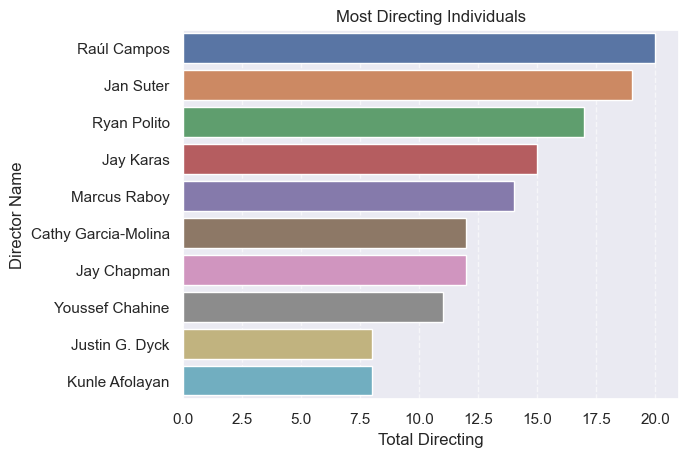

In [37]:
most_direct = (credits[credits['role'] == 'DIRECTOR'].groupby(['name']).size()
                 .reset_index(name='total_directing').sort_values(by='total_directing', ascending=False).head(10))

sns.barplot(x="total_directing", y="name", data=most_direct, orient='h')

plt.xlabel('Total Directing')
plt.ylabel('Director Name')
plt.title('Most Directing Individuals')
plt.grid(axis='x', linestyle='--', alpha=0.6) 

plt.show()


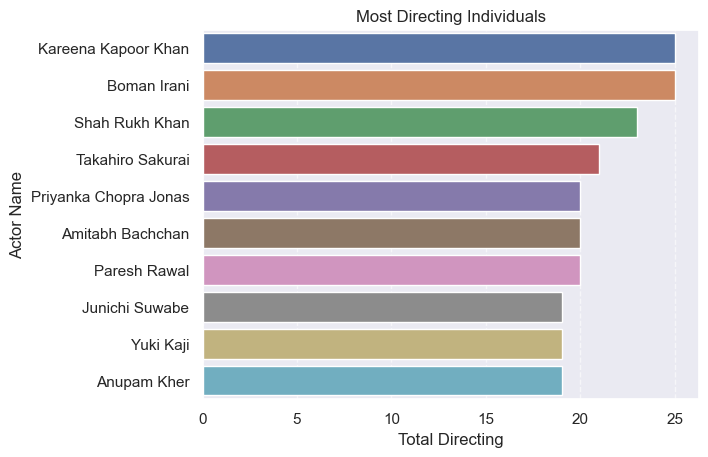

In [38]:
most_actor = (credits[credits['role'] == 'ACTOR'].groupby(['name']).size()
                 .reset_index(name='total_actor').sort_values(by='total_actor', ascending=False).head(10))

sns.barplot(x="total_actor", y="name", data=most_actor, orient='h')  # Adjust palette as needed

plt.xlabel('Total Directing')
plt.ylabel('Actor Name')
plt.title('Most Directing Individuals')
plt.grid(axis='x', linestyle='--', alpha=0.6)  # Optional grid for readability

plt.show()

In [39]:
joined_data = titles.merge(credits, on='id', how='inner')
joined_data = joined_data[['title', 'name', 'role', 'imdb_score']]
print(joined_data.head(200))


           title             name   role  imdb_score
0    Taxi Driver   Robert De Niro  ACTOR         8.2
1    Taxi Driver     Jodie Foster  ACTOR         8.2
2    Taxi Driver    Albert Brooks  ACTOR         8.2
3    Taxi Driver    Harvey Keitel  ACTOR         8.2
4    Taxi Driver  Cybill Shepherd  ACTOR         8.2
..           ...              ...    ...         ...
195  Dirty Harry       John Larch  ACTOR         7.7
196  Dirty Harry     John Mitchum  ACTOR         7.7
197  Dirty Harry       Mae Mercer  ACTOR         7.7
198  Dirty Harry    Lyn Edgington  ACTOR         7.7
199  Dirty Harry      Ruth Kobart  ACTOR         7.7

[200 rows x 4 columns]


In [40]:
merged_df = pd.merge(credits, titles, on='id')

merged_df['id'] = merged_df['id'].astype(str)

actor_avg_scores = merged_df[merged_df['role'] == 'ACTOR'].groupby(['person_id', 'id', 'name'])['imdb_score'].mean().reset_index()
top_actors = actor_avg_scores.groupby('person_id').agg({'imdb_score': 'mean', 'name': 'first'}).reset_index()
top_10_actors = top_actors.sort_values(by='imdb_score', ascending=False).head(10)

print(top_10_actors)

       person_id  imdb_score            name
8551       37752         9.5       Anna Gunn
14107      86591         9.3   Cricket Leigh
391         1303         9.3   Jessie Flower
6030       21033         9.3      Zach Tyler
31999     747462         9.2        Kim Seol
40903    1296454         9.2    Lee Se-young
17815     140194         9.2    Ryu Jun-yeol
15575     103374         9.2      Lee Hye-ri
26659     397186         9.1       Yui Okada
6255       22385         9.1  Michael Jordan


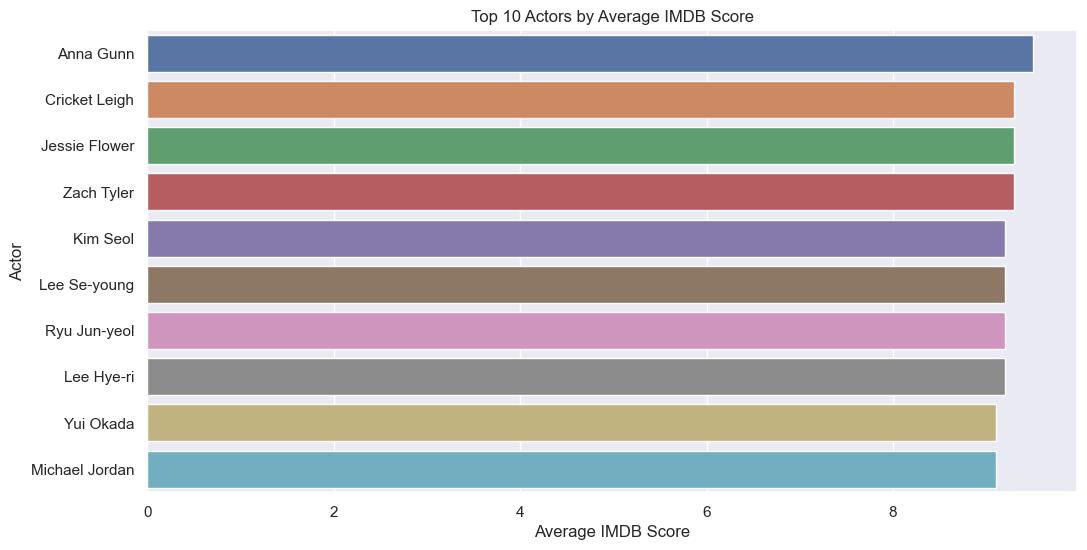

In [41]:
# Визуализация топ-10 актеров
plt.figure(figsize=(12, 6))
sns.barplot(x='imdb_score', y='name', data=top_10_actors)
plt.title('Top 10 Actors by Average IMDB Score')
plt.xlabel('Average IMDB Score')
plt.ylabel('Actor')
plt.show()

In [42]:
merged_df['id'] = merged_df['id'].astype(str)

director_avg_scores = merged_df[merged_df['role'] == 'DIRECTOR'].groupby(['person_id', 'id', 'name'])['imdb_score'].mean().reset_index()

top_director = director_avg_scores.groupby('person_id').agg({'imdb_score': 'mean', 'name': 'first'}).reset_index()

top_10_director = top_director.sort_values(by='imdb_score', ascending=False).head(10)

print(top_10_actors)

       person_id  imdb_score            name
8551       37752         9.5       Anna Gunn
14107      86591         9.3   Cricket Leigh
391         1303         9.3   Jessie Flower
6030       21033         9.3      Zach Tyler
31999     747462         9.2        Kim Seol
40903    1296454         9.2    Lee Se-young
17815     140194         9.2    Ryu Jun-yeol
15575     103374         9.2      Lee Hye-ri
26659     397186         9.1       Yui Okada
6255       22385         9.1  Michael Jordan


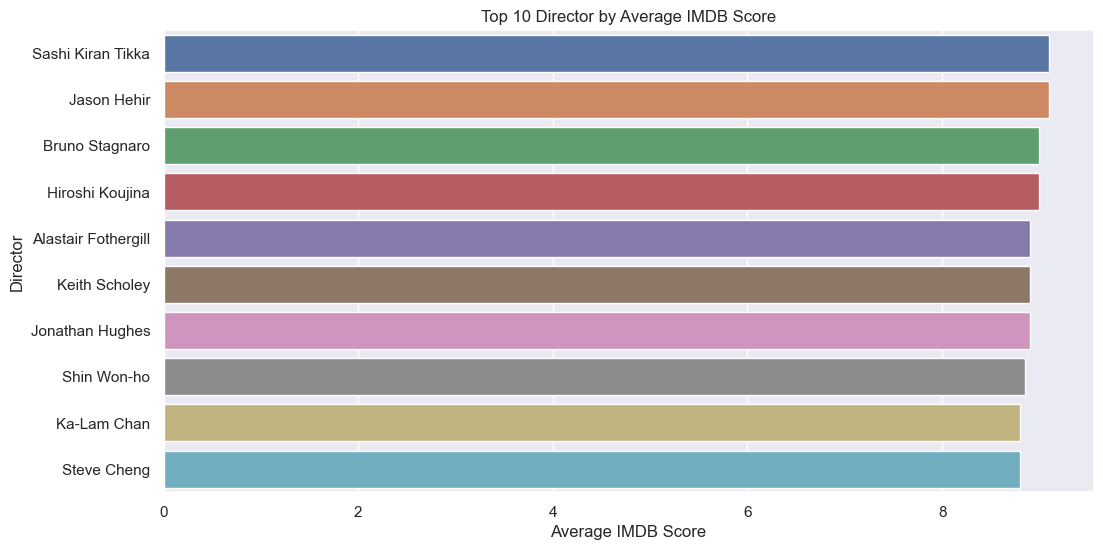

In [43]:
# Визуализация топ-10 актеров
plt.figure(figsize=(12, 6))
sns.barplot(x='imdb_score', y='name', data=top_10_director)
plt.title('Top 10 Director by Average IMDB Score')
plt.xlabel('Average IMDB Score')
plt.ylabel('Director')
plt.show()

<Figure size 1500x800 with 0 Axes>

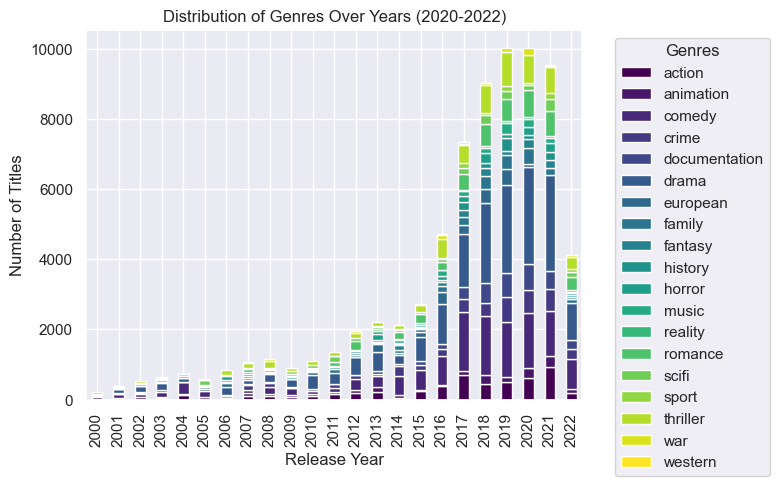

In [44]:
filtered_df = merged_df.query('release_year >= 2000 and release_year <= 2022')

genre_counts = filtered_df.groupby(['release_year', 'genres']).size().unstack(fill_value=0)


plt.figure(figsize=(15, 8))
genre_counts.plot(kind='bar', stacked=True, colormap='viridis', edgecolor='w')

plt.title('Distribution of Genres Over Years (2020-2022)')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.legend(title='Genres', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [45]:
genre_counts_total = merged_df['genres'].value_counts()
print(genre_counts_total)

genres
drama            19488
comedy           13491
thriller          6706
action            5551
romance           5378
crime             4877
documentation     3744
family            2610
european          2418
scifi             2200
animation         2015
horror            1908
fantasy           1801
music             1463
history           1433
war               1028
sport              968
reality            410
western            195
Name: count, dtype: int64


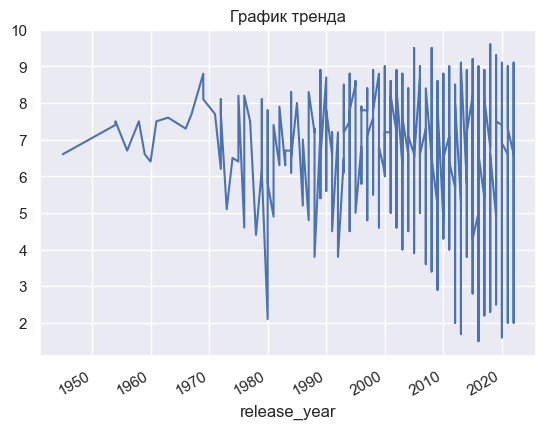

Тренд: release_year
1945-01-01    6.6
1976-01-01    8.2
1972-01-01    7.7
1975-01-01    8.2
1967-01-01    7.7
Name: trend, dtype: float64


In [64]:
result = seasonal_decompose(titles_df['imdb_score'], model='additive', period=1)

result.trend.plot()
plt.title('График тренда')
plt.show()

print('Тренд: {}'.format(result.trend.head()))